#                       British Airways - Customer Review Analysis

# Project Description

To scrap the Customer reviews in the Airline,Airport review and ranking site(Skytrax) and identify the customer statisfaction about the trip by using the Sentimental Analysis. It will help us to know about the customers mentalitity and provide our best to facilities to the customer and improve our revenue.


# Steps and tools to be involed:

Step 1 : Data Collection,

        Scrap the website to collect the customer reviews from 'Skytrax' by using `BeautifulSoup` module.Skytrax is a United Kingdom–based consultancy which runs an airline and airport review and ranking site.If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

Step 2 : Data Preprocessing and Analysis (EDA),

        In this step, we are changeing the saved csv file into DataFrames for analitical purpose. After coverting it into DataFrames we perform some text operations and Analysis to the Dataframe to find the hidden insights of the data that are collected from web. In this project we are using "NLTK" for text analysis (Stop Words, Word Tokenize, SentimentIntensityAnalyzer and some NLTK files).
         NLTK (Natural Language Toolkit) is a popular Python library for working with human language data. It provides a set of tools and resources for tasks such as tokenization, stemming, tagging, parsing, and classification of natural language text.NLTK is designed to help users access and manipulate a wide range of linguistic data, including corpora, lexicons, grammars, and more. It also includes a number of pre-built models and algorithms for natural language processing (NLP) tasks, such as sentiment analysis, machine translation, and text classification.
        
Step 3 : Graphical Representations,

        In this step we are using "Matplotlib" librery for to visuvalize findings in the form of graphs.
       
Step 4 : Result the review analysis by using "Word cloud"

        After finding the insights of the data that is customers review, we just present the frequency of the data by using "wordcloud" in the form of image.


### Importing needed libraries and packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string # we need it for Punctuations removal
from nltk.corpus import stopwords # or we can use from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # it turn text to list but more faster 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud 
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Scrap the customer reviews by using "Request" module and "BeautifulSoup"

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_no = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, page_no + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### Stores the scrapped reviews to DataFrame and converting it into CSV file.

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | This was literally one of the ...
1,✅ Trip Verified | The usual shambolic unfoldi...
2,Not Verified | Lost my case and took 6 weeks ...
3,✅ Trip Verified | The incoming and outgoing f...
4,✅ Trip Verified | Back in December my family ...


In [5]:
df.to_csv("BA_reviews.csv")

### Read the CSV file

In [6]:
reviews = pd.read_csv("BA_reviews.csv")

In [7]:
print(reviews.head())

   Unnamed: 0                                            reviews
0           0  Not Verified |  This was literally one of the ...
1           1  ✅ Trip Verified |  The usual shambolic unfoldi...
2           2  Not Verified |  Lost my case and took 6 weeks ...
3           3  ✅ Trip Verified |  The incoming and outgoing f...
4           4  ✅ Trip Verified |  Back in December my family ...


#  Text preprocessing
#### U have to make sure there are:
1. Remove all useless text data(✅ Trip Verified | ).
2. Turn all the letters into lowercase by using lower() function.
3. Remove all the Punctuations.
4. Tokenization and stop words handling.

In [8]:
def sentiment_clean_text(text):
    
    if '|' in text:
        text =  text.split('|')[1] 
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    return text

def emotion_clean_text(text):
    
    token = word_tokenize(text,"english")
    stop_words = stopwords.words('english') 
    text_list = []
    
    for word in token:
        if word not in stop_words:
            text_list.append(word)

    return text_list


# Emotion text dectionary function
* now it's time to make dictionary function for emotions 

In [9]:
def emotion_maping (file,dic): 
    
    for files in file:
        clear_line = files.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        dic[word] = emotion
            
    return dic

# Vader Sentiment analysis function  
* Now we have cleaned data so we are ready to do sentiment analysis

In [10]:
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text)    
    if (scores['neg'] > scores['pos']):
        return 0
    else:
        return 1

# Main Section 
* Apply all the functions and update the results into the list

In [11]:
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []

airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

emotion_file = open('Emotional_Dict.txt','r',encoding='utf-8') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()

for i in range(len(reviews)):
    
    text = str(reviews['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)

    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    reviews['reviews'][i] = cleaned_text_list
    
    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])   
    
    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

reviews['mood'] = moods_list_st


C:\Users\dines\AppData\Local\Temp\ipykernel_17104\665218803.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviews'][i] = cleaned_text_list


# Plot  findings
* now, we have a list with the segrication of possitive(1) and negative(0) reviews.it's the time to create plots and show the findings.

# Plot for Vader Sentiment Scores 

{0: 459, 1: 541}


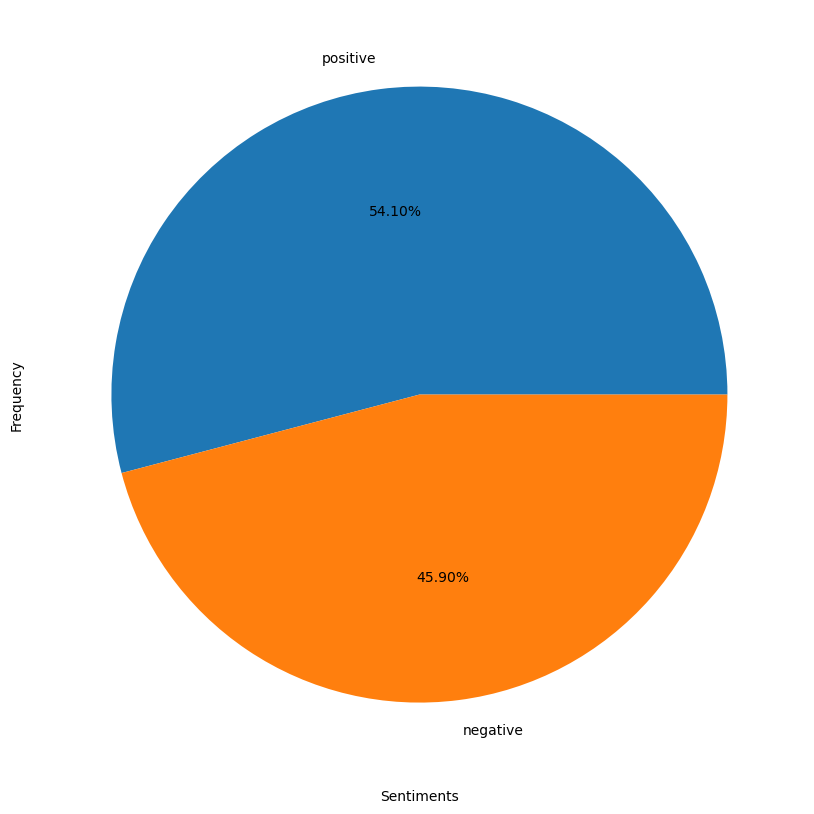

In [12]:
mood_summary = dict(Counter(moods_list_st))
print(mood_summary)

mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

fig, ax = plt.subplots()
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.2f%%')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.show()

## Plot For frequent Emotions

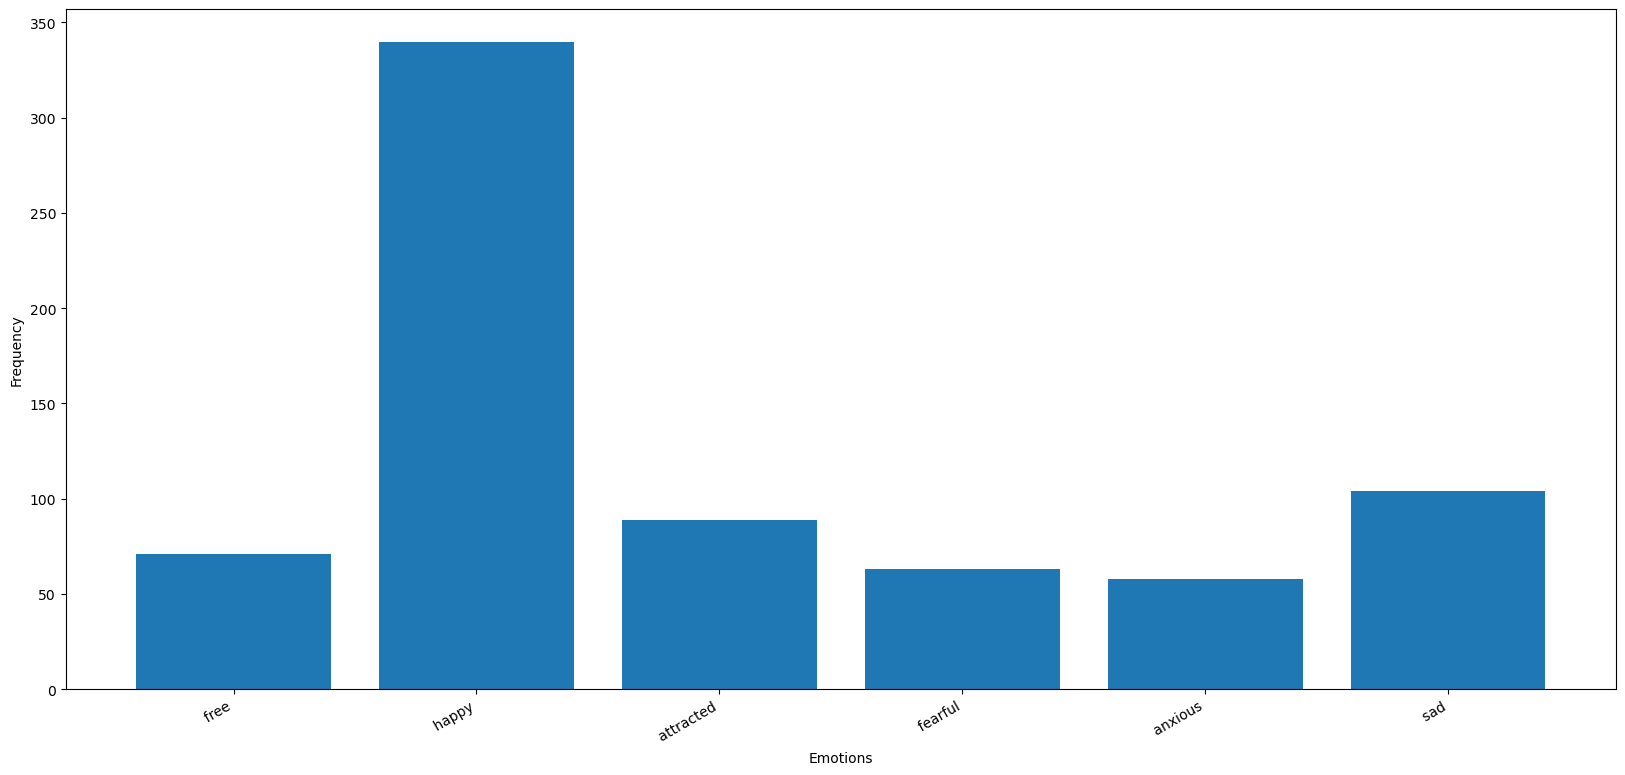

In [13]:
words_score_dict = dict(Counter(temp_emotion_list))
more_than_150_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 50 )

fig, ax = plt.subplots()
ax.bar(more_than_150_emotions.keys(), more_than_150_emotions.values())
fig.autofmt_xdate()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

### Word Cloud for Emotions

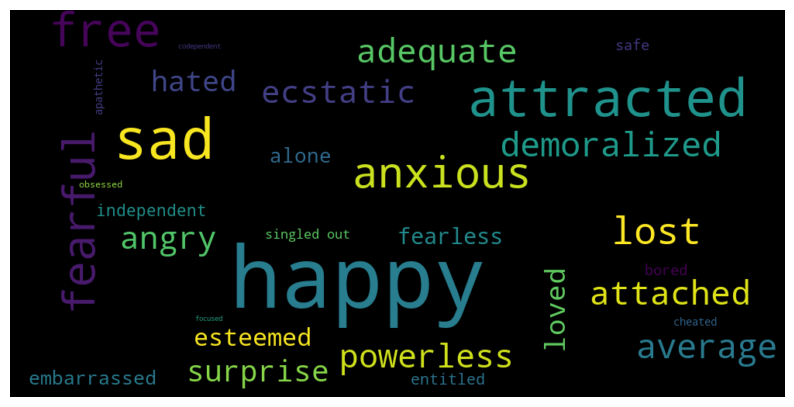

In [14]:
wordcloud = WordCloud(background_color='black', width=1000, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict) 

plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

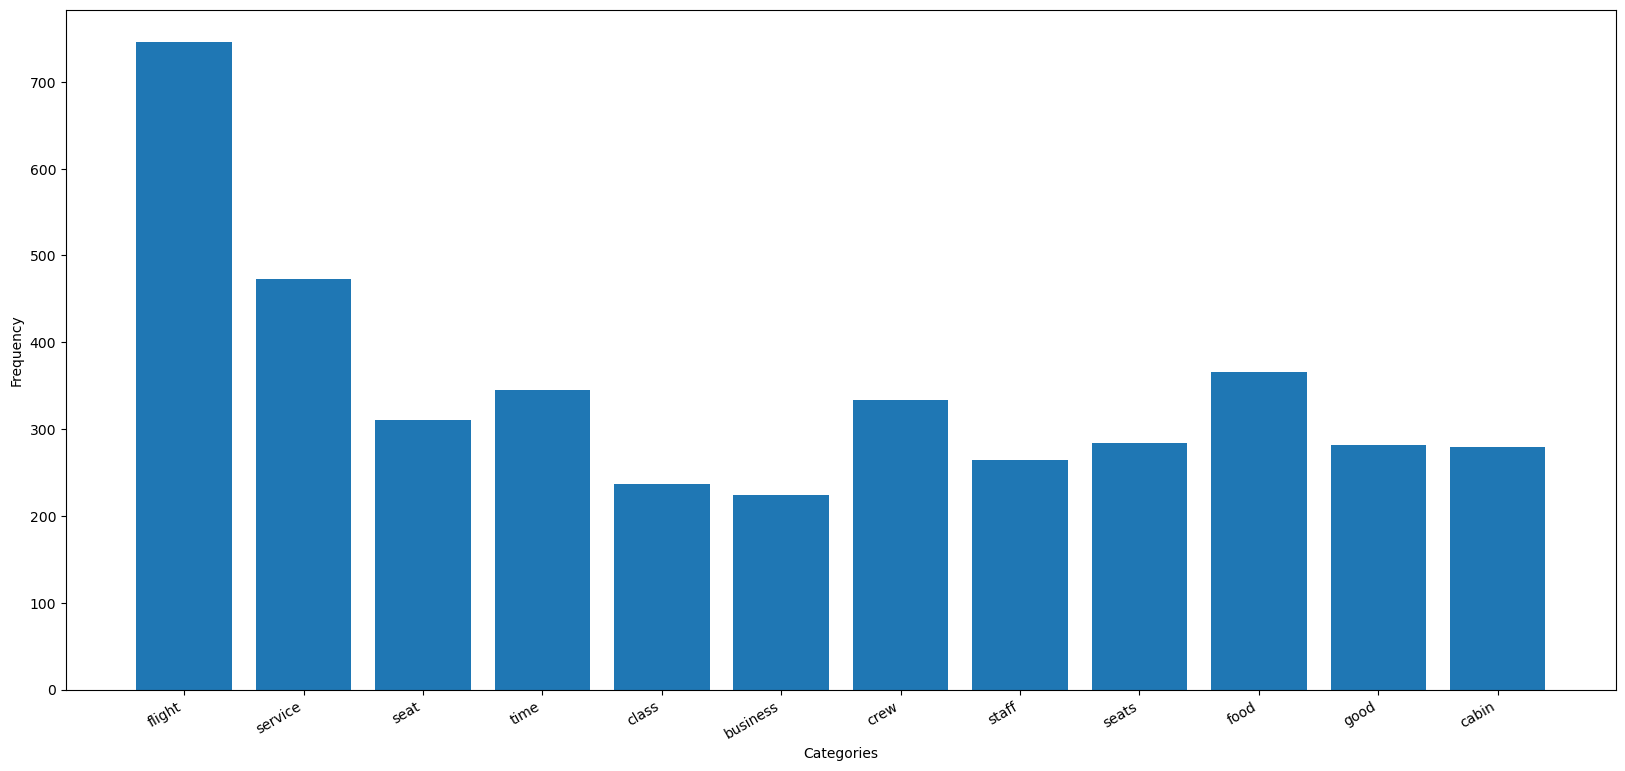

In [15]:
cat_score_dict = dict(Counter(temp_category_list))
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )

fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())
fig.autofmt_xdate()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


### Word Cloud for Categories

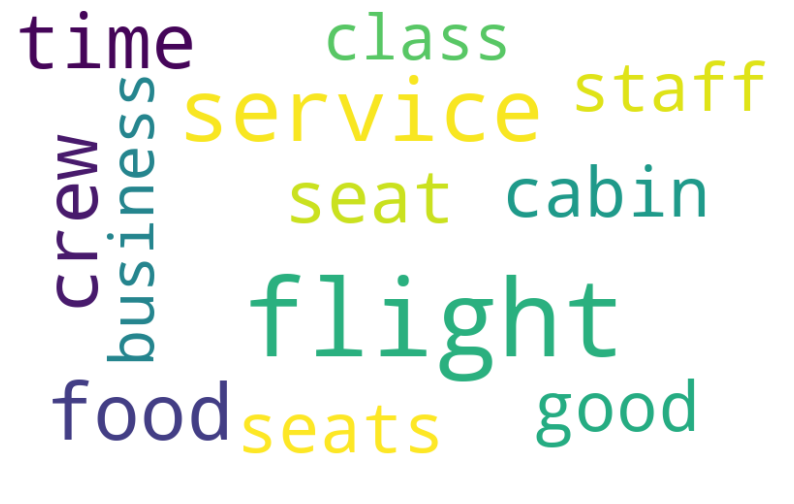

In [16]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Based on the analysis of customer reviews for British Airways using data science techniques, the following conclusions can be drawn:

Overall, British Airways received mixed reviews from customers. While some customers had positive experiences with the airline, others had negative experiences.

Sentiment analysis of customer reviews showed that the majority of reviews were possitive.

By analyzing customer reviews over time, it was possible to identify trends in customer satisfaction and areas where the airline could improve its service.

Overall, the analysis of customer reviews using data science techniques provides valuable insights for British Airways and other airlines looking to improve their customer service and overall customer experience. 